In [38]:
%matplotlib inline

# Python Machine Learning Methodology

## Review

* $X$ the set of observable columns: "features"
* $y$ (typically a single column) the unobservable: "target"
    * predictive features
        * predict a target
        
* $(X, y) \rightarrow \mathcal{A} \rightarrow y_{new} = f(X_{new})$


In [1]:
import pandas as pd

In [2]:
tips = pd.read_csv('datasets/tips.csv'); tips.sample(1)

,total_bill,tip,sex,smoker,day,time,size
152,17.26,2.74,Male,No,Sun,Dinner,3


In [3]:
import seaborn as sns

In [4]:
sns.scatterplot(x=tips['total_bill'], y=tips['tip']);

In [5]:
from sklearn.neighbors import KNeighborsRegressor

The algorithm `KNeighborsRegressor` uses "k-Nearest Neighbors".

To solve a predictive problem, kNN *remembers* the entire dataset; and when *predicting* we look up the closest k-points to our new point, and use the mean of their $y$. 

```sql
SELECT y
FROM historical
WHERE historical.x SIMILAR_TO new_x
LIMIT k
```

---

```sql
SELECT AVG(rating)
FROM movie_reviews
WHERE  (moview_reviews.review_age - 31) < 2
LIMIT k
```

In [6]:
X = tips[['total_bill']]
y = tips['tip']

In [7]:
model = KNeighborsRegressor(11).fit(X, y)

In [8]:
model.predict([
    [10],
    [20],
    [5]
])

array([1.75727273, 3.03454545, 1.74363636])

## How do we select the best algorithm?

The input dataset column on the left shows the true history: we know what points are RED/BLUE. (Eg., RED = LIKE, FRAUD, CAT, ...). 

The first data set is semi-circular (half-moon) in both red and blue. 

Each of the other columns shows a model produced by a different algorithm.

Machine Learning is typically *not* an explanatory activity: it's not science. We routinely do not care about whether a model is an "actual" solution to a problem. We care only that it has an ROI.

Note on the first row, the **true pattern** is semi-circular, but there is noise: effects not due to the true pattern. Eg., consider age vs. film rating; the data will show effects due to the tiredness of the rater -- but we didnt track that; so it isnt a genuine "age effect".

All the models below are overly sensitive to noise, and none are the true model. A true model could be written by a scientist (etc.) -- a machine cannot find it. 

Why?

Machine learning is *automated* model-finding. There is no way to take a dataset and automatically find a true model: any dataset is compatible with an infinite number of models. There is no way to use a dataset to obtain the truth. 

(Humans, via exprimentation, collect sequences of datasets + perform modifications to the environment + have background understanding of the world... this allows us to *provisionally* conclude what is true). 

<img src=https://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png />

## How do I choose "the best" model for my purposes?

Our concern when choosing the best model is to find one which *survives* in the future.

Ie., we don't really care how well we can predict the history -- we know this. What we care about is how well we can predict the future.

But we don't know the future.

So we simulate it.

We show the machine 80% of the historical data, and ask it to predict 20% unseen (from the dataset). 

Does the model still work in areas it hasn't seen before?

This, roughly, approximates the future quality of the model.

## How do we cross-validate models?

* Validation = validating the quality
* Cross = 80/20

In [9]:
from sklearn.model_selection import cross_val_score

In [10]:
cross_val_score(KNeighborsRegressor(), X, y).mean()

0.3325760341493845

## How do I try various models ?

k-Nearst Neighbors accepts a `k` which you can change.

Below, we create a list of possible `ks` and record a mean score for each,

In [11]:
ks = list(range(17, 25))
ks

[17, 18, 19, 20, 21, 22, 23, 24]

In [12]:
scores = []
for k in ks:
    scores.append( cross_val_score(KNeighborsRegressor(k), X, y).mean() )

The index of the maximum score:

In [13]:
best_score_index = scores.index( max(scores) )

The `k` for that index, 

In [14]:
ks[best_score_index]

23

Here then, $k = 23$ gives us the best model.

In [15]:
sns.lineplot(x=ks, y=scores)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

##### <font color=red> Aside: update the `range()` function to try more ks, eg., `range(7, 51)` </font>

## How do I compare with other models?

Just use `cross_val_score`, 

In [16]:
from sklearn.linear_model import LinearRegression

cross_val_score(LinearRegression(), X, y).mean() 

0.45654423588476317

In [17]:
from sklearn.tree import DecisionTreeRegressor

cross_val_score(DecisionTreeRegressor(), X, y).mean() 

-0.0005467625854057356

Above we compute a cross validate (80/20) score for each model. Note *every k* produces a different model.

To select "the best model" we can choose the one with the best cross validation score.

## Aside:How is the cross validation score computed?

In [18]:
cross_val_score(LinearRegression(), X, y)

array([0.55056043, 0.6192854 , 0.47423732, 0.23796202, 0.40067601])

The machine will run the 80/20 split *5* times, so every point will have a chance to be in/out of the historical data. 

NB. you can change the split: below it runs 10 times so, 90/10. 

In [19]:
cross_val_score(LinearRegression(), X, y, cv=10).mean()

0.3489435052629263

In [20]:
cross_val_score(LinearRegression(), X, y).mean()

0.45654423588476317

## Machine Learning Methodology

* Obtain Data
    * read_csv
* Prepare Data
    * isna() dropna()
* Explore Data
    * lineplot, violinplot
* Try lots of models
    * VALIDATION & TRAINING DATASET
    * sklearn....
    * select the best
        * cross_val_score
* Evaluate the best model based on biz objectives
    * TEST dataset
    * is there an ROI?
    * custom biz logic
* Deploy
    * REFIT THE MODEL WILL ALL DATA
    * write an app
    * write a report

### Aside: ROI "Peformance" Evaluation

When coming to do the ROI/Evaluation step, if you need data here (often you do), then you shouldnt use any data the machine has seen at any point (, essentially cheating, you may get too good an answer). 

So typically practicioners will hide 20% of the data until the very end of the project. 

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_val, X_eval, y_val, y_eval = train_test_split(X, y)

In [23]:
cross_val_score(LinearRegression(), X_val, y_val)

array([0.32766995, 0.39089726, 0.37427087, 0.25655031, 0.48667812])

In [24]:
model = LinearRegression().fit(X_val, y_val)

Data to be used when doing the final ROI/Eval step:

In [25]:
model.score(X_eval, y_eval)

0.5748892090346407

...this should be a custom measure that relates to profits (QALY, etc.).

## Exercise (15 - 30min)

Consider the classification problem below,

#### Step 1. Obtain Data

---

In [36]:
import os

if not os.path.exists('datasets'):
    os.mkdir('datasets')

In [37]:
sns.load_dataset('exercise').to_csv('datasets/exercise.csv', index=False)

---

The exercise dataset shows pulse responses to exercises of various durations on various diets,

In [30]:
exercise = pd.read_csv('datasets/exercise.csv')

exercise.sample(3)

,Unnamed: 0,id,diet,pulse,time,kind
15,15,6,no fat,83,1 min,rest
69,69,24,low fat,87,1 min,running
2,2,1,low fat,88,30 min,rest


<font color=red>Can we predict the type of diet using the other data?</font>

#### Step 2. Explore Data

In [29]:
exercise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  90 non-null     int64 
 1   id          90 non-null     int64 
 2   diet        90 non-null     object
 3   pulse       90 non-null     int64 
 4   time        90 non-null     object
 5   kind        90 non-null     object
dtypes: int64(3), object(3)
memory usage: 4.3+ KB


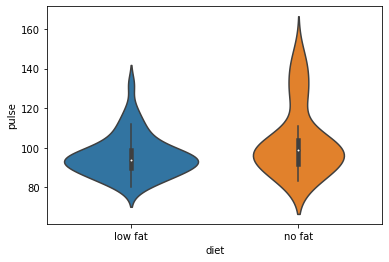

In [89]:
sns.violinplot(x=exercise['diet'], y=exercise['pulse'])

#### Step 3. Prepare Data

In [82]:
exercise['time'].value_counts()

1 min     30
30 min    30
15 min    30
Name: time, dtype: int64

In [83]:
exercise['time_min'] = exercise['time'].replace({
    '1 min': 1,
    '30 min': 30,
    '15 min': 15
})

#### Step 4. Try various models

In [100]:
X_exercise = exercise[['time_min', 'pulse']]
y_exercise = exercise['diet']

In [101]:
from sklearn.neighbors import KNeighborsClassifier

Here we score the model by asking it to predict data it's already seen...

In [102]:
model = KNeighborsClassifier().fit(X_exercise, y_exercise)
model.score(X_exercise, y_exercise)

0.6888888888888889

...this is a terrible scoring method, as it could easily get 100% on seen data... and yet totally fail in the future. 

---

## <font color=red> Exercise Question </font>

Consider the for loop above in this notebook which tries various `k` values and records a cross validation score for them. 

Reporduce this analysis for this dataset and hence find the best model.


---

## Extra

Consider how you might approach steps 5 and 6 below. In evaluating the model we want to use data it has never seen before. Modify your above solution to use `train_test_split`, and so, preserve 20% of the data for scoring.

Then use, `model.score` against this unseen 20% -- in practice, you would use a business-specific scoring measure.

#### Step 5. Evaluate against business objectives

#### Step 6. Deploy

Finally deploying can mean: writing an app, a report, an automation system...

Below, simply, use `model.predict` on your best model with some trial prediction points; ie., try out some time and pulse values and see what the predictions are.

`.predict` is the core machine learning operation in the deploy phase of a project. 